# 🧩 Problem Statement
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi-urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount,Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

* Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
* Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank. 

Although this course is specifically built to give you a walkthrough of Loan Prediction problem, you can always refer the content to get a comprehensive overview to solve a classification problem.

After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.

## 🎯 Objective

Build a classification model that predicts loan approval based on the applicant's details. The goal is to:
- Understand which features affect loan approval.
- Train models with high prediction accuracy.
- Save time and human effort by automating the process.

# Hypothesis Generation
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which we think can affect the Loan Approval (dependent variable for this loan prediction problem):
* Salary: Applicants with high income should have more chances of loan approval.
* Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
* Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Loan term: Loan for less time period and less amount should have higher chances of approval.
* EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

 These are some of the factors which we think can affect the target variable, you can come up with many more factors

# 🧰 1. Importing Libraries
"A well-prepared data analysis starts with importing the right tools."
In this section, we import the essential Python libraries required for our analysis:
* NumPy and Pandas for numerical operations and data manipulation.
* Matplotlib and Seaborn for static data visualization.
* Plotly Express for interactive visualizations that offer deeper exploration.

We also enable %matplotlib inline to render plots directly within the notebook environment.

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# 📂 2. Loading the Dataset
"We begin the analysis by loading the dataset into memory."
* For this practice problem, we have been given two CSV files:
1. loan_sanction_train.csv : will be used for training the model, i.e. our model will learn from this file. It contains all the feature variables and the target variable.
2.  loan_sanction_test.csv : contains all the feature variables, but not the target variable. We will apply the model to predict the target variable for the test data.

* Viewing the first few rows (.head()) offers a preview of how the data is structured, helping to verify a successful load and giving early insights into the content.


In [101]:
test = pd.read_csv(r"E:\rohan\Tech\AI\Projects\Classification\loan_sanction_test.csv")
test.head()
train = pd.read_csv(r"E:\rohan\Tech\AI\Projects\Classification\loan_sanction_train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
loan_test = test.copy()

In [103]:
loan_train = train.copy()

Firstly, we will check the features present in our data and then we will look at their data types.

In [104]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [105]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

* object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

* int64: It represents the integer variables. ApplicantIncome is of this format.

* float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are:CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [106]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [107]:
loan_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Let’s look at the shape of the dataset

In [108]:
loan_train.shape,loan_test.shape

((614, 13), (367, 12))

# 3.🧭 Target Variable

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.
Frequency table of a variable will give us the count of each category in that variable.

In [109]:
count = loan_train['Loan_Status'].value_counts()
count

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Check percentage of both values

In [110]:
loan_train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

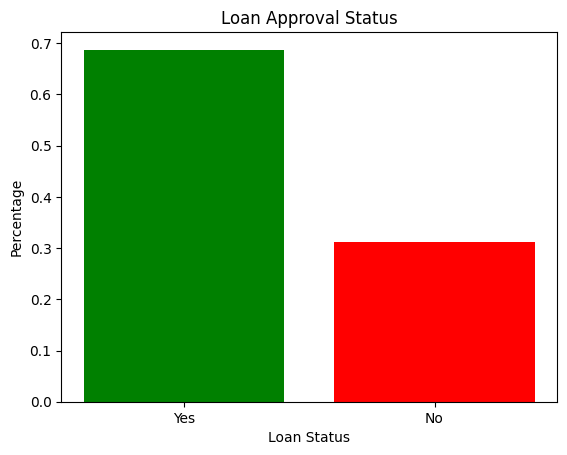

In [111]:
Y = loan_train['Loan_Status'][train['Loan_Status'] == 'Y'].count() / len(train)
N = loan_train['Loan_Status'][train['Loan_Status'] == 'N'].count() / len(train)
labels = ['Yes', 'No']
values = [Y, N]
colors = ['green', 'red']
plt.bar(labels, values, color=colors)
plt.xlabel("Loan Status")
plt.ylabel("Percentage")
plt.title("Loan Approval Status")
plt.show()

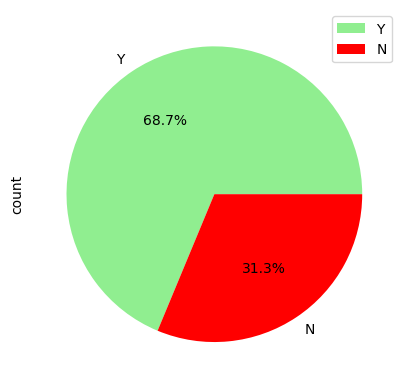

In [112]:
count.plot.pie(autopct='%1.1f%%',labels=count.index, colors=['lightgreen', 'red'])
plt.legend()
plt.show()

The loan of 422(around 68.7%) people out of 614 was approved.
Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.
* Categorical features: These features have categories (Gender,Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education,Property_Area)
* Numerical features These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.

# 4.🧪 Independent Variable (Categorical)

In [113]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='Gender'>

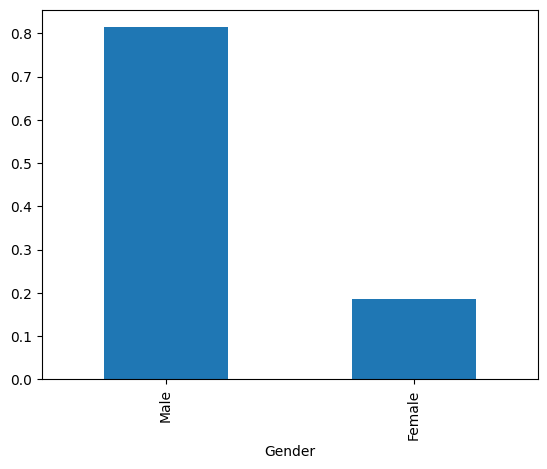

In [114]:
loan_train['Gender'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Married'>

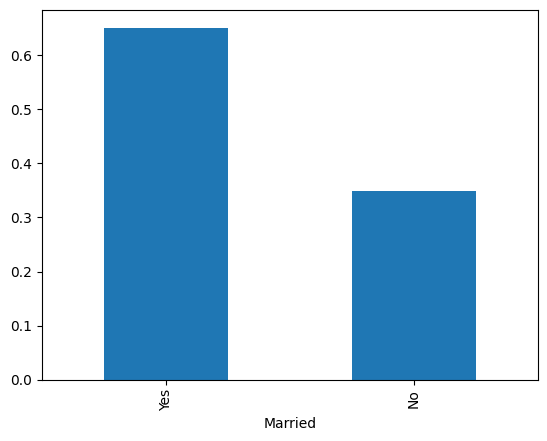

In [115]:
loan_train['Married'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Self_Employed'>

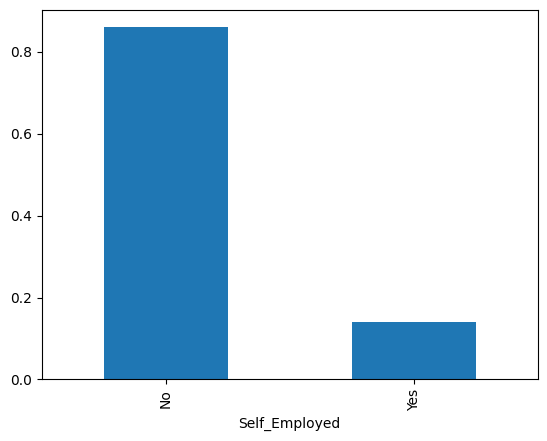

In [116]:
loan_train['Self_Employed'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Credit_History'>

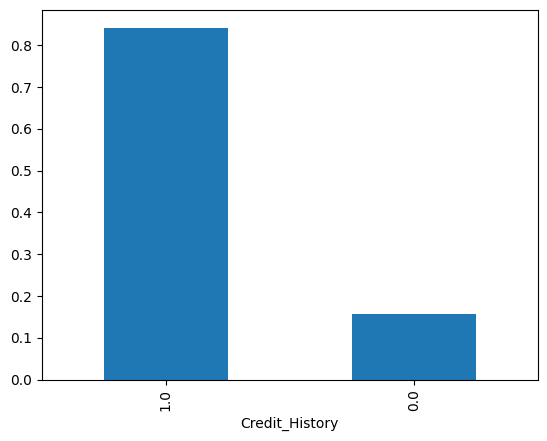

In [117]:
loan_train['Credit_History'].value_counts(normalize=True).plot.bar()

It can be inferred from the above bar plots that:
* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

Now let’s visualize the ordinal variables

# 5.🧪Independent Variable(Ordinal)

<Axes: xlabel='Dependents'>

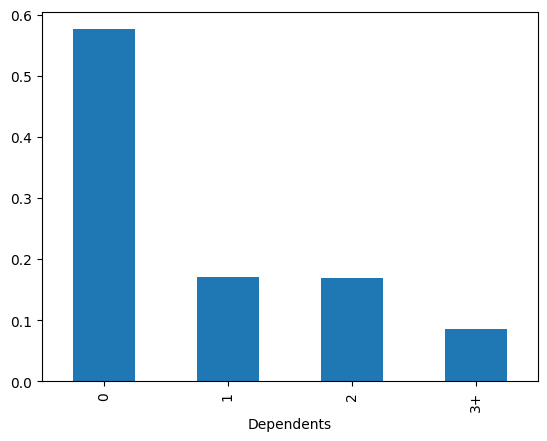

In [118]:
loan_train['Dependents'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Education'>

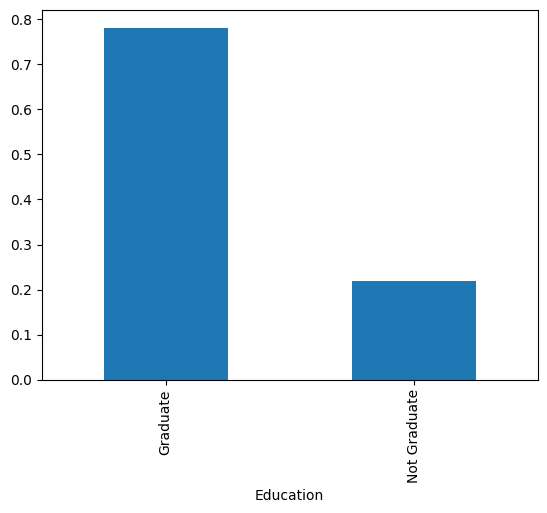

In [119]:
loan_train['Education'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Property_Area'>

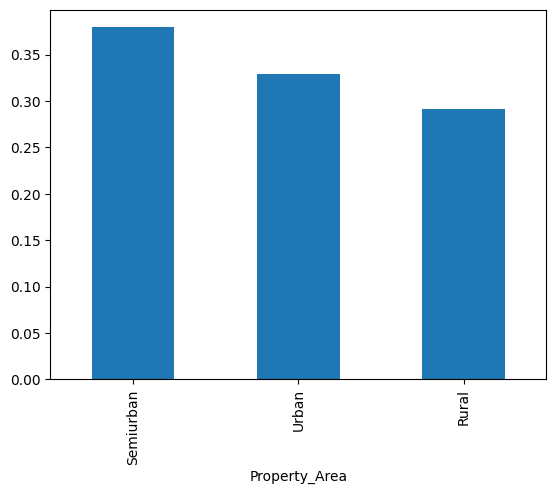

In [120]:
loan_train['Property_Area'].value_counts(normalize=True).plot.bar()

# 6.🧪Independent Variable (Numerical)

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

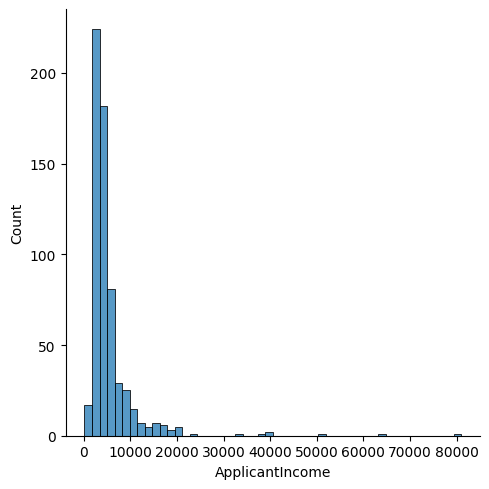

In [121]:
sns.displot(loan_train['ApplicantIncome'])

* Applicant

In [122]:
loan_train['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

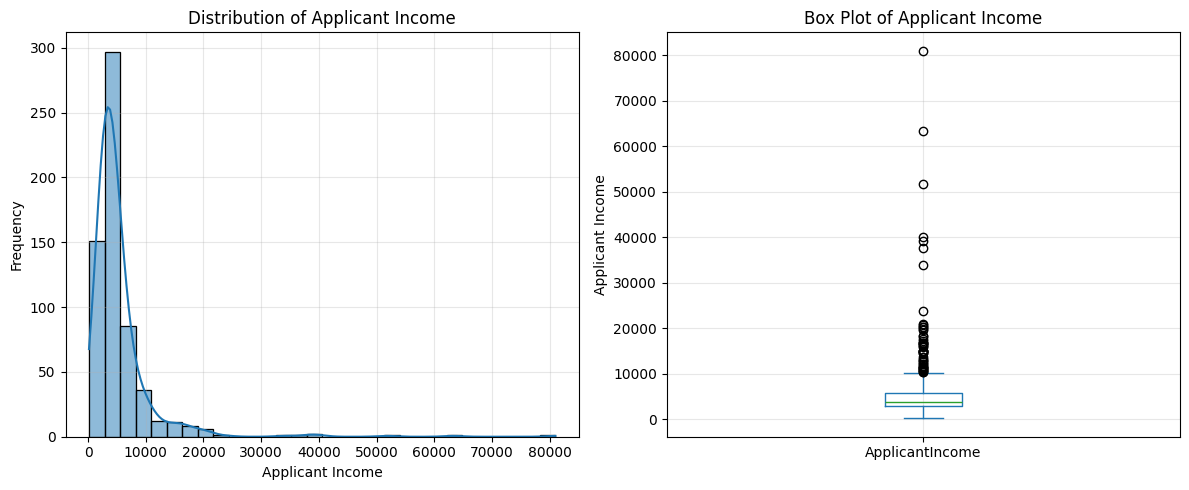

Applicant Income Summary Statistics:
Mean: 5403.46
Median: 3812.50
Std Dev: 6109.04
Min: 150.00
Max: 81000.00
25th Percentile: 2877.50
75th Percentile: 5795.00

Number of outliers (IQR method): 50
Percentage of outliers: 8.14%


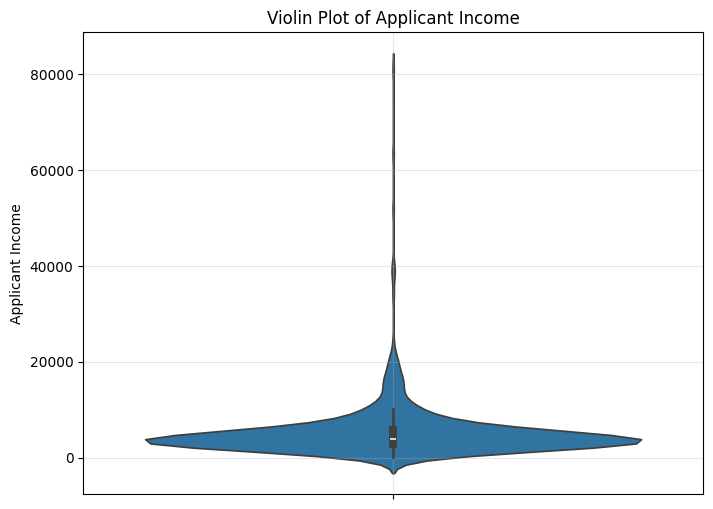

In [123]:
# Let's analyze the distribution of ApplicantIncome using histogram and box plot

plt.figure(figsize=(12, 5))

# Left subplot: Distribution plot (histogram with KDE)
plt.subplot(1, 2, 1)
sns.histplot(loan_train['ApplicantIncome'].dropna(), kde=True, bins=30)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Right subplot: Box plot
plt.subplot(1, 2, 2)
loan_train['ApplicantIncome'].plot.box()
plt.title('Box Plot of Applicant Income')
plt.ylabel('Applicant Income')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Add summary statistics
print("Applicant Income Summary Statistics:")
print("="*40)
print(f"Mean: {loan_train['ApplicantIncome'].mean():.2f}")
print(f"Median: {loan_train['ApplicantIncome'].median():.2f}")
print(f"Std Dev: {loan_train['ApplicantIncome'].std():.2f}")
print(f"Min: {loan_train['ApplicantIncome'].min():.2f}")
print(f"Max: {loan_train['ApplicantIncome'].max():.2f}")
print(f"25th Percentile: {loan_train['ApplicantIncome'].quantile(0.25):.2f}")
print(f"75th Percentile: {loan_train['ApplicantIncome'].quantile(0.75):.2f}")

# Check for outliers using IQR method
Q1 = loan_train['ApplicantIncome'].quantile(0.25)
Q3 = loan_train['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = loan_train[(loan_train['ApplicantIncome'] < lower_bound) | 
                      (loan_train['ApplicantIncome'] > upper_bound)]
print(f"\nNumber of outliers (IQR method): {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(loan_train)*100:.2f}%")

# Additional visualization: Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(y=loan_train['ApplicantIncome'])
plt.title('Violin Plot of Applicant Income')
plt.ylabel('Applicant Income')
plt.grid(True, alpha=0.3)
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.
 
The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Let us segregate them by Education:

Text(0.5, 0.98, '')

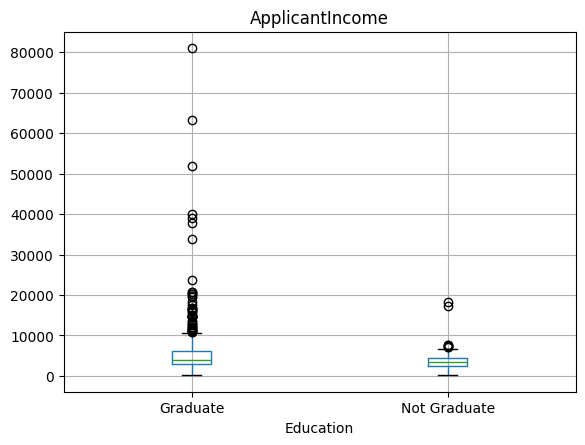

In [124]:
loan_train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

In [125]:
loan_train['CoapplicantIncome']

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\3822071901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train['CoapplicantIncome']);


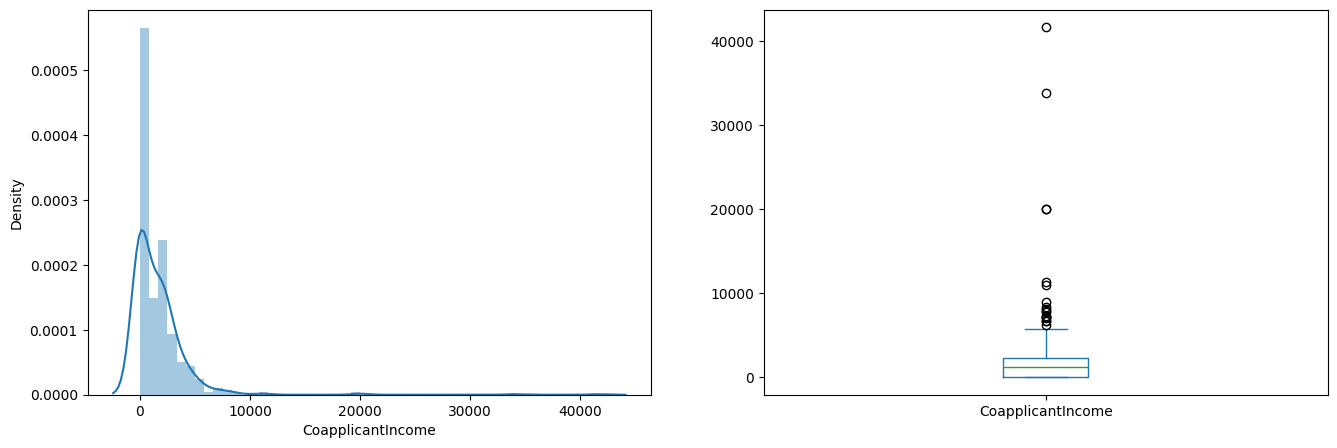

In [126]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_train['CoapplicantIncome']);
plt.subplot(122)
loan_train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

 We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.
 
 Let’s look at the distribution of LoanAmount variable

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\2267109061.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount']);


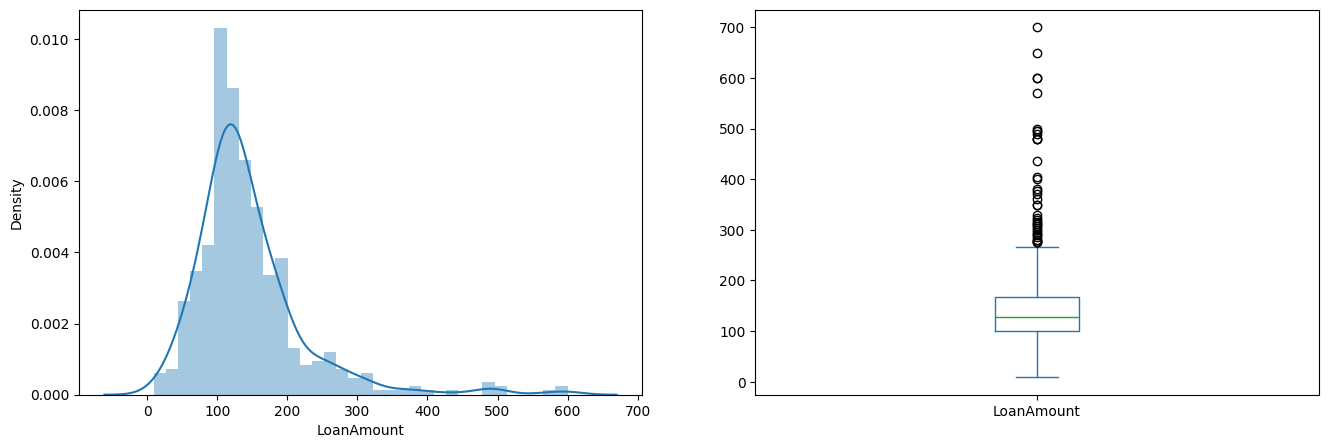

In [127]:
plt.figure(1)
plt.subplot(121)
df = loan_train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
loan_train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.
Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.
Lets recall some of the hypotheses that we generated earlier:
* Applicants with high income should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis.
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

# 6. 📊	Categorical Independent Variable v/s Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. Crosstab, groupby and pivot tables restructures the dataframe, making it easy to find relevant information more easily. 

In [128]:
Gender = pd.crosstab(loan_train['Gender'],loan_train['Loan_Status'])
Gender.head()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [129]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<Axes: xlabel='Gender'>

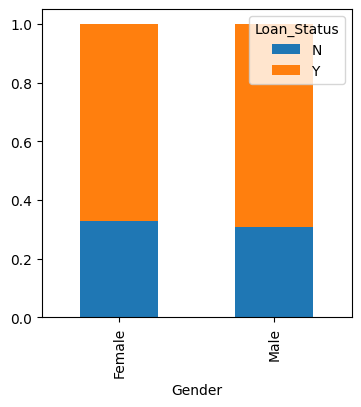

In [130]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable

In [131]:
Married = pd.crosstab(loan_train['Married'],loan_train['Loan_Status'])
Dependents = pd.crosstab(loan_train['Dependents'],loan_train['Loan_Status'])
Education = pd.crosstab(loan_train['Education'],loan_train['Loan_Status'])
Self_Employed = pd.crosstab(loan_train['Self_Employed'],loan_train['Loan_Status'])
Property_Area = pd.crosstab(loan_train['Property_Area'],loan_train['Loan_Status'])

In [132]:
Married.div(Married.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


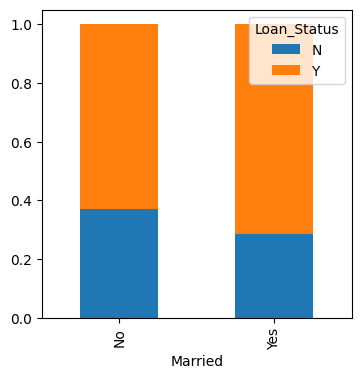

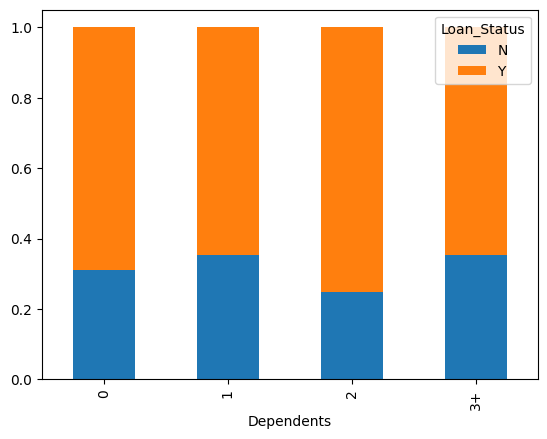

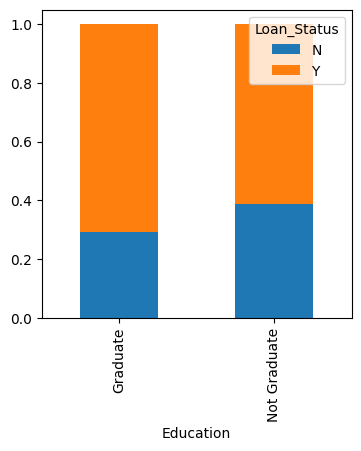

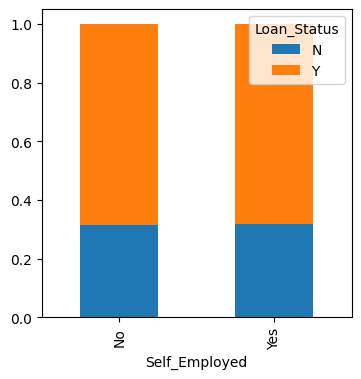

In [133]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans. Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

In [134]:
Credit_History = pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'])
Property_Area = pd.crosstab(loan_train['Property_Area'],loan_train['Loan_Status'])

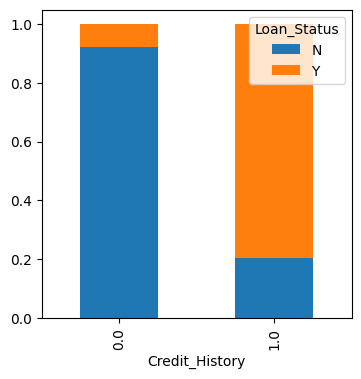

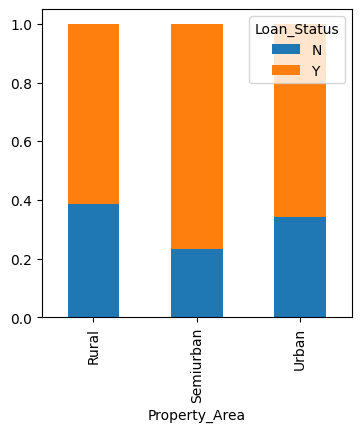

In [135]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()


* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

# 7.📊Numerical Independent Variable vs Target variable

We will try to find the mean income of people for which theloan has been approved vs the mean income of people for which the loan has not been approved.

<Axes: xlabel='Loan_Status'>

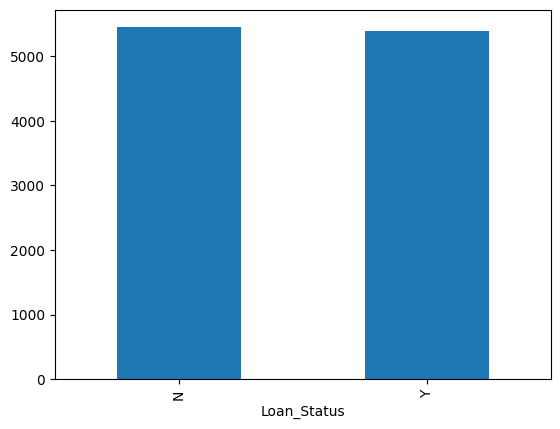

In [136]:
loan_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [137]:
bins=[0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']

loan_train['Income_bin'] = pd.cut(loan_train['ApplicantIncome'],bins,labels=group)
loan_train['Income_bin']

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very High
612    Very High
613         High
Name: Income_bin, Length: 614, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

In [138]:
Income_bin = pd.crosstab(loan_train['Income_bin'],loan_train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


In [139]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Income_bin,,
Low,0.314815,0.685185
Average,0.296460,0.703540
High,0.314685,0.685315
Very High,0.335766,0.664234


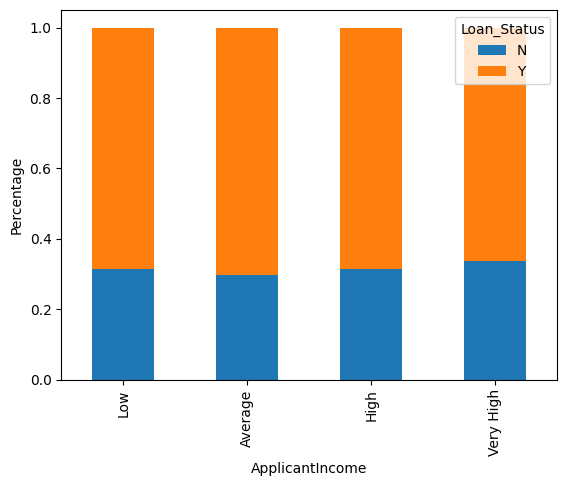

In [140]:
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if theapplicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner

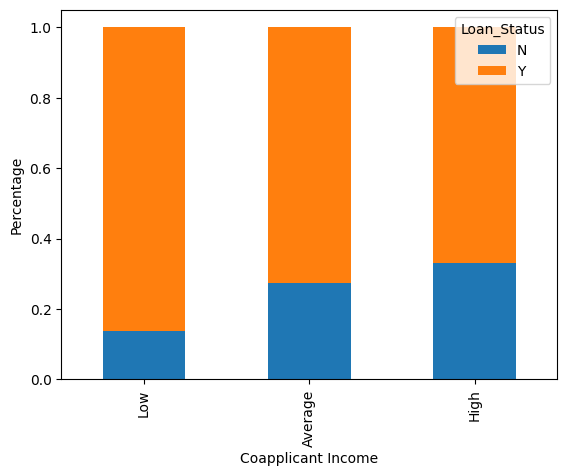

In [141]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
loan_train['Coapplicant_Income_bin'] = pd.cut(loan_train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(loan_train['Coapplicant_Income_bin'],loan_train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Coapplicant Income')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 

So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.
 
Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total_Income on the Loan_Status
* Applicant and coapplicant income must be integer not str


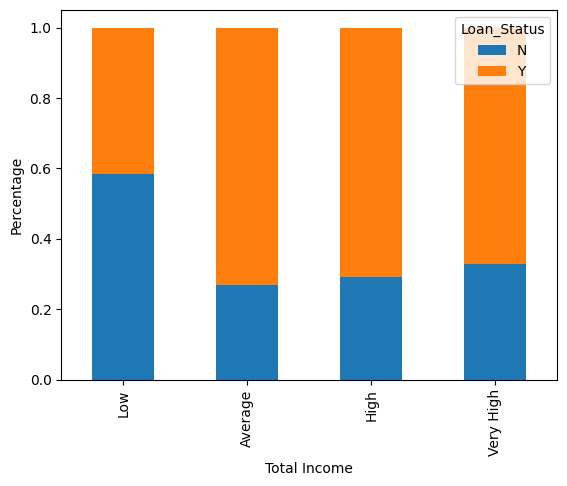

In [142]:
loan_train['Total_Income'] = loan_train['ApplicantIncome']+loan_train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
loan_train['Total_Income_bin'] = pd.cut(loan_train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(loan_train['Total_Income_bin'],loan_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average,High and Very High Income.

Let’s visualize the Loan amount variable.

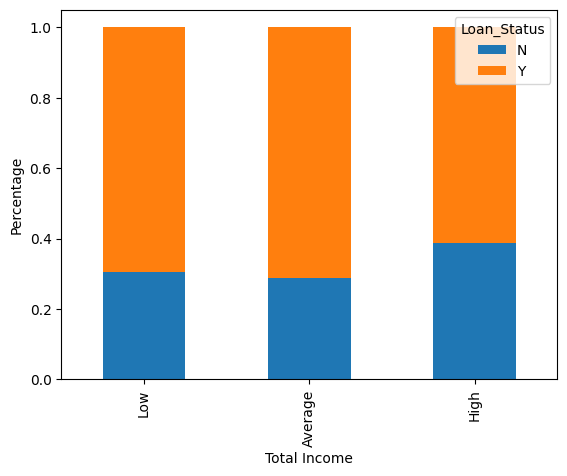

In [143]:
bins = [0,100,200,700]
group = ['Low','Average','High']
loan_train['LoanAmount_bin'] = pd.cut(loan_train['LoanAmount'],bins,labels=group)
LoanAmount_Bin = pd.crosstab(loan_train['LoanAmount_bin'],loan_train['Loan_Status'])
LoanAmount_Bin.div(LoanAmount_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total Income')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.
 
Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 

One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1

In [144]:
loan_train = loan_train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin','LoanAmount_bin'],axis=1)
loan_train['Dependents'].replace('3+',3,inplace=True)
loan_test['Dependents'].replace('3+',3,inplace=True)
loan_train['Loan_Status'].replace('N',0,inplace=True)
loan_train['Loan_Status'].replace('Y',1,inplace=True)

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\858300530.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_train['Loan_Status'].replace('Y',1,inplace=True)


In [145]:
loan_train.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

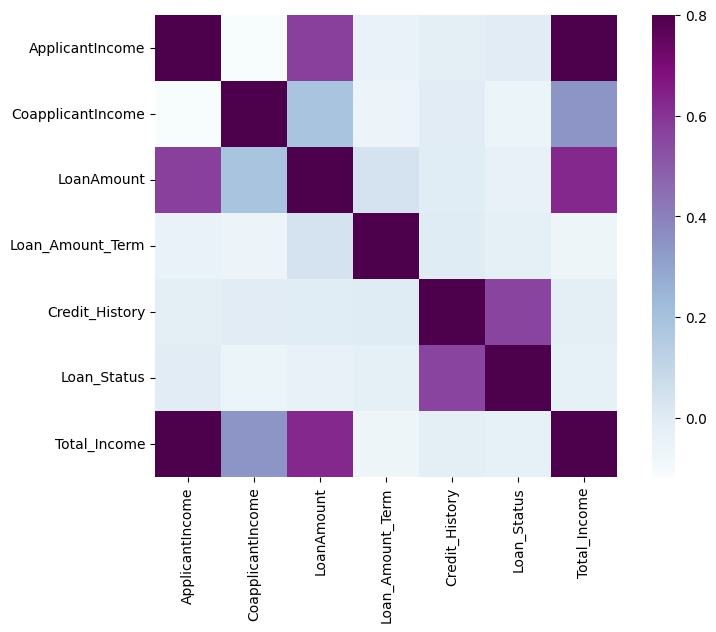

In [146]:
matrix = loan_train.select_dtypes(include=['number']).corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

# 8.📈 Missing value Imputation
Let’s list out feature-wise count of missing values.

In [147]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:
* For numerical variables : imputation using mean or median.
* For categorical variables : imputation using mode.

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

Note : Imputation is the process of replacing missing data with substituted values

In [148]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0],inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0],inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0],inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [149]:
loan_train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

 It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode
 of this variable.

In [150]:
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0],inplace=True)

 Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill
 the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of
 outliers.

In [151]:
loan_train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

 Now lets check whether all the missing values are filled in the dataset

In [152]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [153]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [154]:
loan_test['Gender'].fillna(loan_train['Gender'].mode()[0],inplace=True)
loan_test['Dependents'].fillna(loan_train['Dependents'].mode()[0],inplace=True)
loan_test['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace=True)
loan_test['Credit_History'].fillna(loan_train['Credit_History'].mode()[0],inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0],inplace=True)
loan_test['LoanAmount'].fillna(loan_train['LoanAmount'].mode()[0],inplace=True)


In [155]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# 9.🧠 Outlier Treatment

As we saw earlier in univariate analysis, Loan_Amount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

For the sample data set:

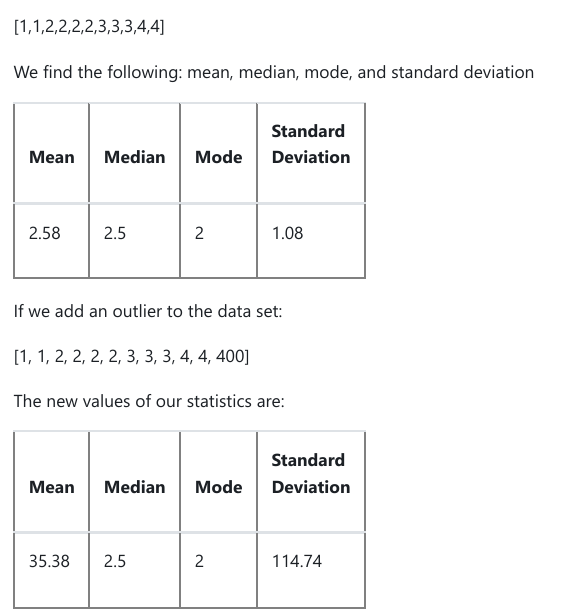

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So,
 
we get a distribution similar to normal distribution.
 Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

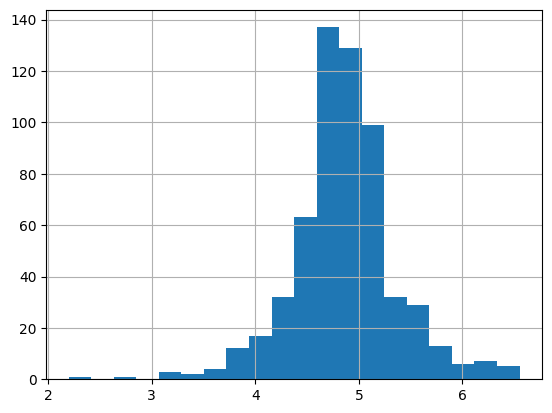

In [156]:
import numpy as np
loan_train['LoanAmount_log'] = np.log(train['LoanAmount'])
loan_train['LoanAmount_log'].hist(bins=20)
loan_test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

# 10. 🧾 Evaluation Metrics

The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. 

Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:
* Accuracy: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is how a confusion matrix looks like:
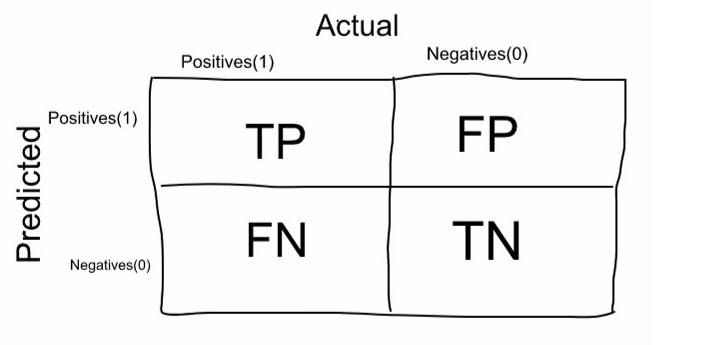
* True Positive: Targets which are actually true(Y) and we have predicted them true(Y)
* True Negative: Targets which are actually false(N) and we have predicted them false(N)
* False Positive: Targets which are actually false(N) but we have predicted them true(T)
* False Negative: Targets which are actually true(T) but we have predicted them false(N)

 Using these values, we can calculate the accuracy of the model. The accuracy is given by
![class 3.png](<attachment:class 3.png>)
Specificity and Sensitivity plays a crucial role in deriving ROC curve.
* ROC curve
* Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
* The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

This is how a ROC curve looks like :

![class 4.png](<attachment:class 4.png>)

* The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
* So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.
* We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.
* For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
* The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.
 
Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.
* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
* This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function. 
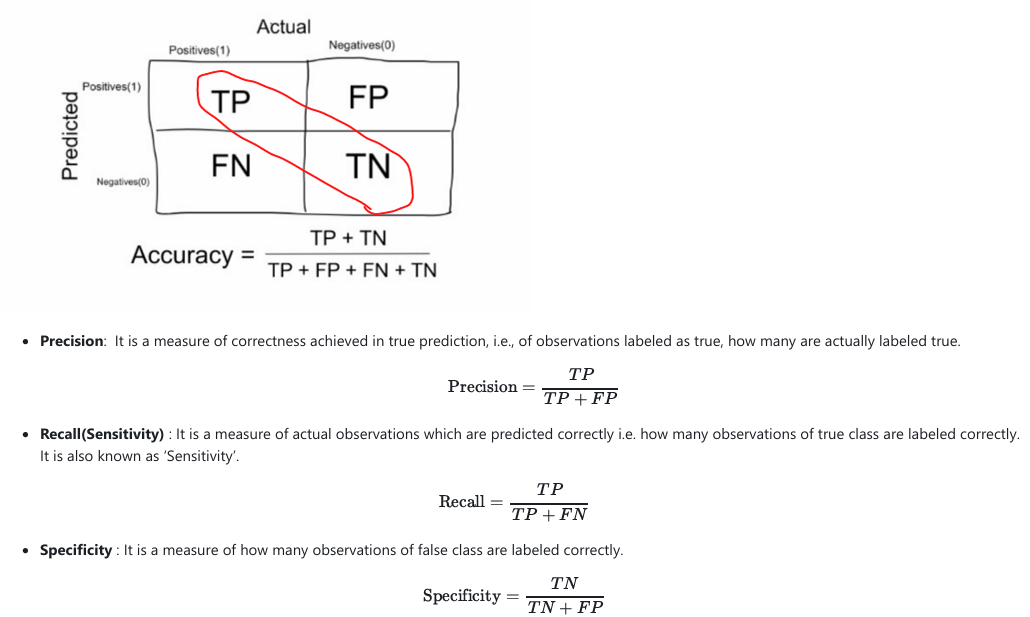
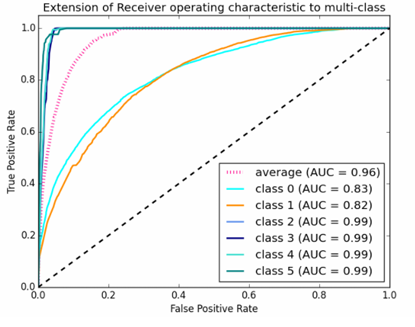

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training

In [157]:
loan_train.dropna(inplace=True)

In [158]:
loan_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       5
dtype: int64

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another  dataset

In [159]:
loan_train = loan_train.drop('Loan_ID',axis=1)
loan_test = loan_test.drop('Loan_ID',axis=1)

In [160]:
X = loan_train.drop(columns='Loan_Status',axis=1)
y = loan_train['Loan_Status']

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

* Consider the “Gender” variable. It has two classes, Male and Female. 
* As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
* We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.
* Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
* Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male

In [161]:
X = pd.get_dummies(X)
loan_train = pd.get_dummies(loan_train)
loan_test = pd.get_dummies(loan_test)

In [162]:
X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Total_Income               0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

Now we will train the model on training dataset and make predictions for the test 
we can divide our train dataset. But can we validate these predictions? One way of doing this is dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataser).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)


The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. 

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [165]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7752808988764045

In [166]:
x_train.dropna(inplace=True)

In [167]:
x_train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Total_Income               0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

Let’s make predictions for the test dataset

In [168]:
pred_test = model.predict(x_train)
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [169]:
# test_index

In [170]:
# train_index

In [171]:
# X.loc[test_index].head()

In [172]:
# X.loc[train_index].head()

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. 
Some of the common methods for validation are listed below:
* The validation set approach
* k-fold cross validation
* We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example
* Leave one out cross validation (LOOCV)
* Stratified k-fold cross validation

In this section we will learn about stratified k-fold cross validation. Let us understand how it works:
* Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
* For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
* It is generally a better approach when dealing with both bias and variance.
* A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

Below is the visualization of a stratified k-fold validation when k=5
![class 5.png](<attachment:class 5.png>)
Let’s import StratifiedKFold from sklearn and fit the model
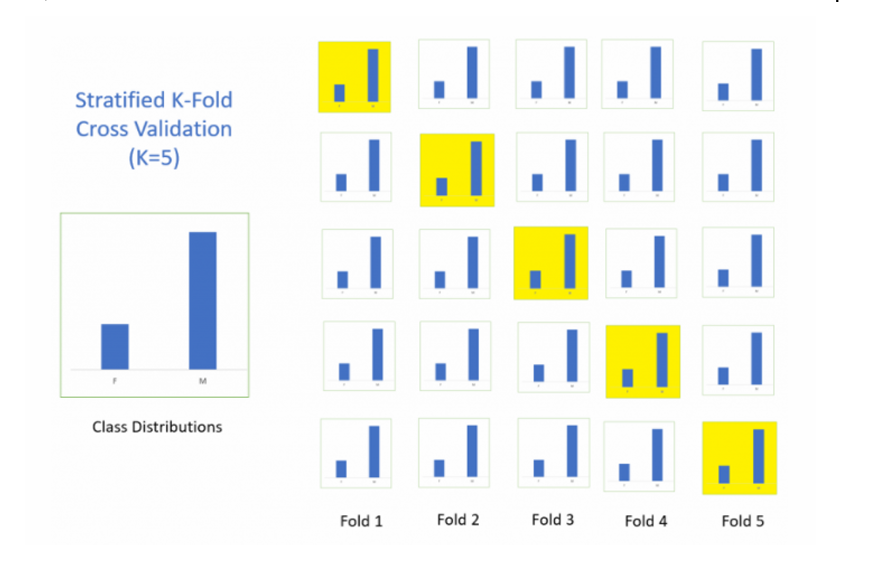

In [173]:
from sklearn.model_selection import StratifiedKFold

 Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset

In [174]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(xvl)
# pred=model.predict_proba(xvl)

C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stab


1 of kfold 5
accuracy_score 0.7647058823529411

2 of kfold 5
accuracy_score 0.8571428571428571

3 of kfold 5
accuracy_score 0.7966101694915254

4 of kfold 5
accuracy_score 0.8135593220338984

5 of kfold 5
accuracy_score 0.8220338983050848


C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stab

In [175]:
pred=model.predict_proba(xvl)
pred*100

array([[29.22427127, 70.77572873],
       [33.23853589, 66.76146411],
       [ 5.79615225, 94.20384775],
       [20.42334451, 79.57665549],
       [16.41682488, 83.58317512],
       [ 8.5443059 , 91.4556941 ],
       [24.84106331, 75.15893669],
       [79.15513147, 20.84486853],
       [83.10752338, 16.89247662],
       [69.70749067, 30.29250933],
       [20.7488705 , 79.2511295 ],
       [18.55759398, 81.44240602],
       [25.17528669, 74.82471331],
       [13.34807189, 86.65192811],
       [12.55748328, 87.44251672],
       [ 8.90503997, 91.09496003],
       [ 8.96775054, 91.03224946],
       [94.40504561,  5.59495439],
       [18.57733533, 81.42266467],
       [81.54146018, 18.45853982],
       [22.62721531, 77.37278469],
       [12.75360466, 87.24639534],
       [22.35160713, 77.64839287],
       [11.77893687, 88.22106313],
       [11.96244646, 88.03755354],
       [27.43749091, 72.56250909],
       [18.63012159, 81.36987841],
       [28.15471987, 71.84528013],
       [39.02361403,

 The mean validation accuracy for this model turns out to be 0.83. Let us visualize the roc curve

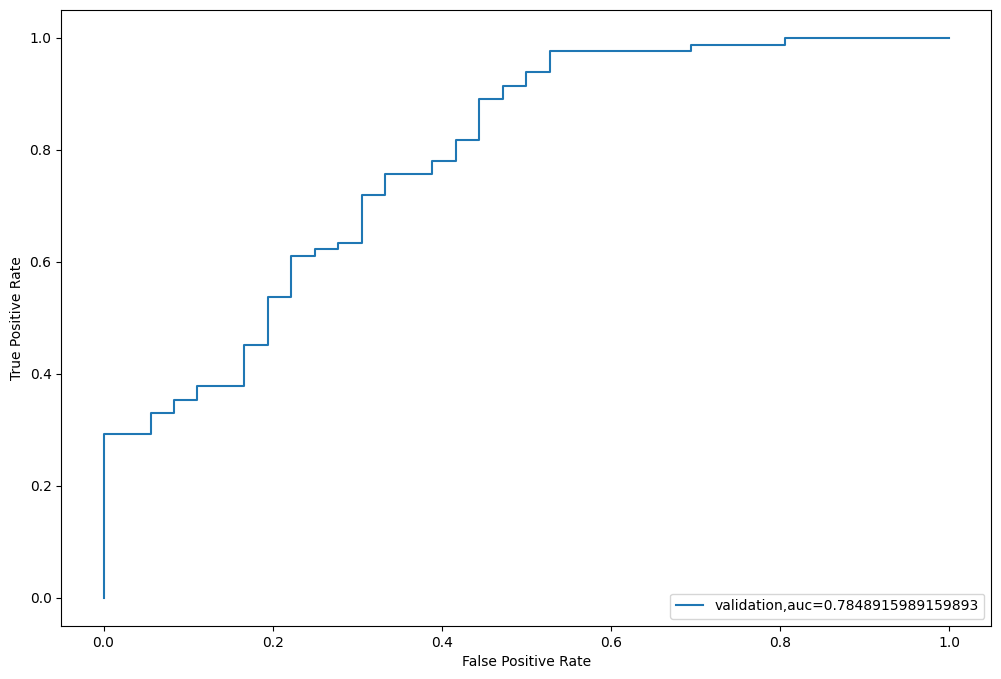

In [176]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl,  pred[:, -1])
auc = metrics.roc_auc_score(yvl,pred[:,-1])

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation,auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:
* Total Income : As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high,chances of loan approval might also be high.
* EMI : EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
* Balance Income : This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval

In [177]:
yvl.shape

(118,)

In [178]:
pred.shape

(118, 2)

In [179]:
# pred

In [180]:
loan_train['Total_Income'] = loan_train['ApplicantIncome']+loan_train['CoapplicantIncome']
loan_test['Total_Income'] = loan_test['ApplicantIncome']+loan_test['CoapplicantIncome']

Let’s check the distribution of Total Income.

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\4170357504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train['Total_Income'])


<Axes: xlabel='Total_Income', ylabel='Density'>

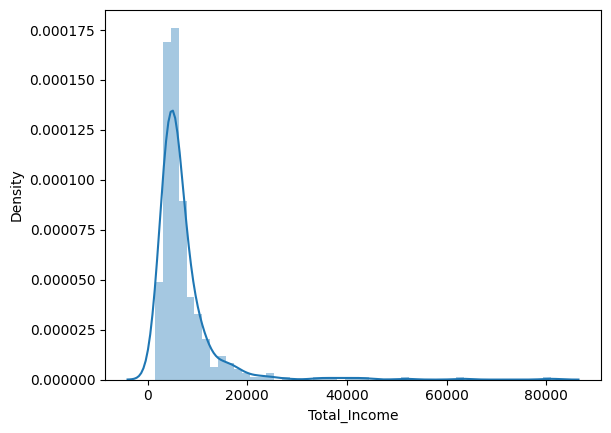

In [181]:
sns.distplot(loan_train['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\3820080308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train['Total_Income'])


<Axes: xlabel='Total_Income', ylabel='Density'>

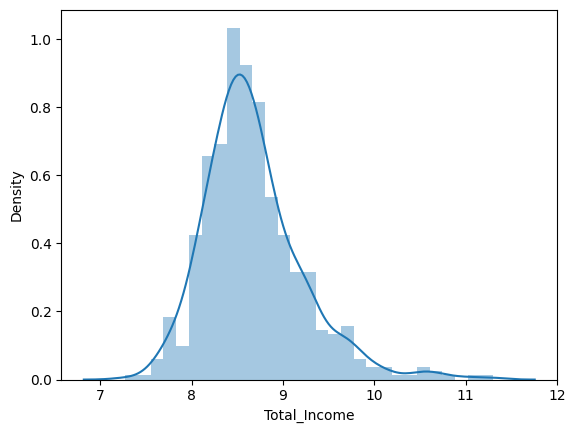

In [182]:
loan_train['Total_Income']=np.log(loan_train['Total_Income'])
sns.distplot(loan_train['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now.

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\2551256829.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_test['Total_Income_log'])


<Axes: xlabel='Total_Income_log', ylabel='Density'>

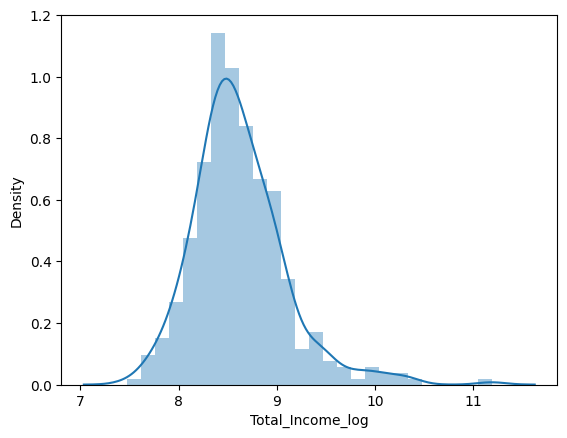

In [183]:
loan_test['Total_Income_log'] = np.log(loan_test['Total_Income'])
sns.distplot(loan_test['Total_Income_log'])

In [184]:
loan_train['EMI'] = loan_train['LoanAmount']/loan_train['Loan_Amount_Term']
loan_test['EMI'] = loan_test['LoanAmount']/loan_test['Loan_Amount_Term']

Let’s check the distribution of EMI variable

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\3037201803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train['EMI'])


<Axes: xlabel='EMI', ylabel='Density'>

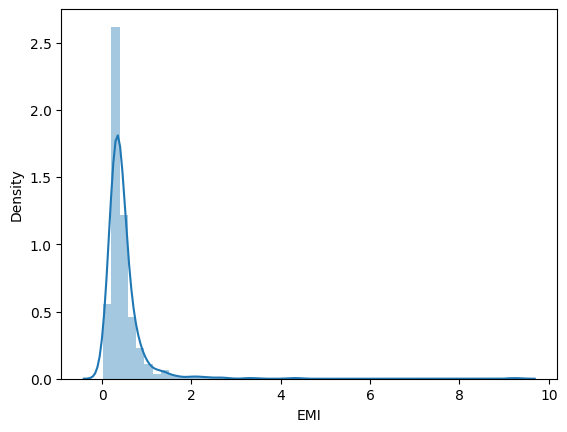

In [185]:
sns.distplot(loan_train['EMI'])

Let us create Balance Income feature now and check its distribution

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_4116\1288003220.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train['Balance_Income'])


<Axes: xlabel='Balance_Income', ylabel='Density'>

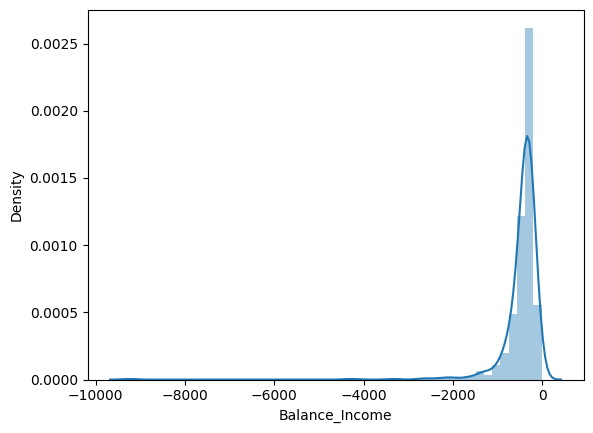

In [186]:
loan_train['Balance_Income'] = loan_train['Total_Income'] - (loan_train['EMI']*1000)
loan_test['Balance_Income'] = loan_test['Total_Income']-(loan_test['EMI']*1000)
sns.distplot(loan_train['Balance_Income'])

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated.

We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [187]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.
We will build the following models in this section.
* Random Forest
* Logistic Regression
* Decision Tree
* XGBoost

Let’s prepare the data for feeding into the models.

In [188]:
X = loan_train.drop(columns='Loan_Status',axis=1)
y = loan_train.Loan_Status

# 11.👨🏽‍💻 ALGORITHMS

1. Logistic Regression

In [189]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('/n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.iloc[train_index],X.iloc[test_index]
  ytr,yvl = y.iloc[train_index],y.iloc[test_index]

  model = LogisticRegression(random_state=1)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1

pred_test = model.predict(xvl)
# pred = model.predict_proba(xvl)
# pred

C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/n1 of kfold 5
accuracy_score 0.7226890756302521
/n2 of kfold 5
accuracy_score 0.773109243697479
/n3 of kfold 5
accuracy_score 0.7711864406779662
/n4 of kfold 5
accuracy_score 0.7711864406779662
/n5 of kfold 5
accuracy_score 0.711864406779661


C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pavilion\AppData\Roaming\Python\Python314\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stab

2. Decision Tree

In [190]:
from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('/n{} of kfold{}'.format(i,kf.n_splits))
  xtr,xvl = X.iloc[train_index],X.iloc[test_index]
  ytr,yvl = y.iloc[train_index],y.iloc[test_index]
  model = tree.DecisionTreeClassifier(random_state=1)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1

pred_test = model.predict(xvl)

/n1 of kfold5
accuracy_score 0.680672268907563
/n2 of kfold5
accuracy_score 0.7899159663865546
/n3 of kfold5
accuracy_score 0.635593220338983
/n4 of kfold5
accuracy_score 0.7966101694915254
/n5 of kfold5
accuracy_score 0.7203389830508474


We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters,max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

3. Grid Search

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
paramgrid = {'max_depth' : list(range(1,20,2)),
             'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)

grid_search.fit(xtr,ytr)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...andom_state=1)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [1, 3, ...], 'n_estimators': [1, 21, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >

In [192]:
grid_search.best_estimator_

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",81
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_t

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values

In [193]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('/n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.iloc[train_index],X.iloc[test_index]
  ytr,yvl = y.iloc[train_index],y.iloc[test_index]
  model = RandomForestClassifier(random_state= 1,max_depth=1,n_estimators=81)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1

pred_test = model.predict(xvl)

/n1 of kfold 5
accuracy_score 0.6890756302521008
/n2 of kfold 5
accuracy_score 0.6974789915966386
/n3 of kfold 5
accuracy_score 0.6949152542372882
/n4 of kfold 5
accuracy_score 0.6949152542372882
/n5 of kfold 5
accuracy_score 0.6949152542372882


In [194]:
pred2 = model.predict_proba(xvl)
pred2*100

array([[27.86884465, 72.13115535],
       [29.81473641, 70.18526359],
       [30.71230502, 69.28769498],
       [26.89461452, 73.10538548],
       [26.41818561, 73.58181439],
       [26.28424998, 73.71575002],
       [27.65709656, 72.34290344],
       [40.03359305, 59.96640695],
       [42.69366012, 57.30633988],
       [40.1697006 , 59.8302994 ],
       [27.61341954, 72.38658046],
       [27.58431129, 72.41568871],
       [27.39597751, 72.60402249],
       [28.62298638, 71.37701362],
       [26.28424998, 73.71575002],
       [26.28424998, 73.71575002],
       [26.28424998, 73.71575002],
       [42.89438893, 57.10561107],
       [31.10083592, 68.89916408],
       [40.04681898, 59.95318102],
       [27.92701783, 72.07298217],
       [27.30201315, 72.69798685],
       [28.77176114, 71.22823886],
       [26.28424998, 73.71575002],
       [28.0384544 , 71.9615456 ],
       [31.21389129, 68.78610871],
       [27.75557045, 72.24442955],
       [28.71354439, 71.28645561],
       [30.18486486,

4. XGBoost

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. It’s a boosting algorithm and you may refer this article to know more about boosting.

XGBoost works only with numeric variables and we have already replaced the categorical variables with
numeric variables.

Let’s have a look at the parameters that we are going to use in our model:
* n_estimator: This specifies the number of trees for the model.
* max_depth: We can specify maximum depth of a tree using this parameter

In [195]:
from xgboost import XGBClassifier
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('/n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.iloc[train_index],X.iloc[test_index]
  ytr,yvl = y.iloc[train_index],y.iloc[test_index]
  model = XGBClassifier(n_estimators=50,max_depth=4)
  model.fit(xtr,ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
pred_test = model.predict(xvl)

/n6 of kfold 5


accuracy_score 0.7058823529411765
/n7 of kfold 5
accuracy_score 0.8067226890756303
/n8 of kfold 5
accuracy_score 0.7711864406779662
/n9 of kfold 5
accuracy_score 0.7711864406779662
/n10 of kfold 5
accuracy_score 0.8135593220338984


In [196]:
pred3=model.predict_proba(xvl)
pred3

array([[0.04437101, 0.955629  ],
       [0.08790171, 0.9120983 ],
       [0.54621947, 0.45378053],
       [0.0394147 , 0.9605853 ],
       [0.08411449, 0.9158855 ],
       [0.03589559, 0.9641044 ],
       [0.07109785, 0.92890215],
       [0.99084306, 0.00915695],
       [0.9201387 , 0.07986127],
       [0.9773091 , 0.02269089],
       [0.12018299, 0.879817  ],
       [0.0217036 , 0.9782964 ],
       [0.00722456, 0.99277544],
       [0.2392425 , 0.7607575 ],
       [0.0120042 , 0.9879958 ],
       [0.01509756, 0.98490244],
       [0.00889099, 0.991109  ],
       [0.9772242 , 0.02277582],
       [0.13830268, 0.8616973 ],
       [0.95658094, 0.04341904],
       [0.24788105, 0.75211895],
       [0.07411057, 0.92588943],
       [0.02856708, 0.9714329 ],
       [0.02402121, 0.9759788 ],
       [0.34766632, 0.6523337 ],
       [0.5556419 , 0.44435808],
       [0.02614385, 0.97385615],
       [0.09429449, 0.9057055 ],
       [0.08562207, 0.9143779 ],
       [0.15484065, 0.84515935],
       [0.

## ✅ Conclusion

The loan approval prediction model accurately identifies eligible applicants by analyzing patterns in income, employment, credit history, and loan terms. Among all models tested, Logistic Regression and Random Forest Classifier provided the best balance between accuracy and interpretability.

Key findings:

- **Income**, **credit history**, and **loan amount** are the strongest predictors for loan approval.
- Logistic Regression and Decision Trees yielded reliable performance.
- Proper preprocessing (handling missing values, encoding) significantly impacts accuracy.
- The final model can be deployed to automate the loan screening process, saving time and ensuring fairness.
- Credit history has the highest impact on loan approval.
- Applicants with higher income and fewer dependents have better approval chances.
- Loan amount and term show moderate impact, especially when combined with income data.
- Preprocessing steps like imputing missing values and label encoding significantly improved performance.

This solution not only reduces manual effort but also ensures fairer, data-driven decisions—especially beneficial for large-scale financial operations.

🔮 Future Development Suggestions

* Web App Integration: Deploy the model using Streamlit or Flask for live loan eligibility checks.

* Explainability: Integrate SHAP or LIME for transparency in model decisions.

* Additional Features: Include property type, co-applicant details, and credit score for better accuracy.

* Model Monitoring: Track prediction accuracy post-deployment to catch data drift.

* Bias Mitigation: Analyze and reduce any demographic bias in predictions to ensure fairness.
